# Casos confirmados de Covid-19

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima, ADFTest
#from pmdarima.arima import ADFTest
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#elemina os warnings das bibliotecas 
import warnings 
warnings.filterwarnings('ignore')


%matplotlib inline
print("*** IMPORTES FEITO COM SUCESSO***")

*** IMPORTES FEITO COM SUCESSO***


In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'C:/Users/Rogerio Lopes/Desktop/Rogerio/IBM_Coursera/casosGlobalCovid.csv')

('C:/Users/Rogerio Lopes/Desktop/Rogerio/IBM_Coursera/casosGlobalCovid.csv',
 <http.client.HTTPMessage at 0x14110414070>)

In [3]:
df_covid = pd.read_csv('casosGlobalCovid.csv')
df_covid.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058


In [4]:
df_covid = df_covid.rename(columns = {'Country/Region':'Paises'})
df_covid.head()

,Province/State,Paises,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058


In [5]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
df_covid.head()

,Province/State,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
1,NaN,Albania,0,0,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
4,NaN,Angola,0,0,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058


In [6]:
df_pais = df_covid.groupby('Paises').sum()
df_pais.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
Paises,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
Albania,0,0,0,0,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
Algeria,0,0,0,0,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
Andorra,0,0,0,0,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
Angola,0,0,0,0,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058


In [7]:
date = df_pais.loc['Brazil'].index
cases = df_pais.loc['Brazil'].values
# date cases

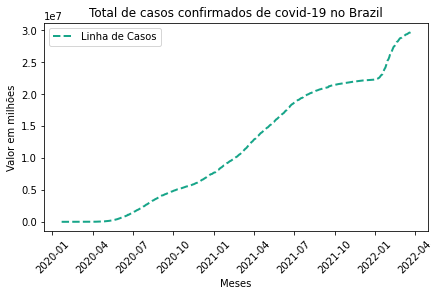

In [8]:
plt.figure(constrained_layout=True)
plt.plot(pd.to_datetime(date), cases, color='#17a589', linestyle='--', linewidth=2)
plt.title('Total de casos confirmados de covid-19 no Brazil')
plt.legend(['Linha de Casos'])
plt.xlabel('Meses')
plt.xticks(rotation=45)
plt.ylabel('Valor em milhões')
_ = plt.show()

In [9]:
dados_Brasil = df_pais.loc['Brazil']
dados_Brasil[0:9]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    0
1/28/20    0
1/29/20    0
1/30/20    0
Name: Brazil, dtype: int64

# Eliminando números de caso "0"

In [10]:
dados_Brasil = dados_Brasil[dados_Brasil > 0]
dados_Brasil[0:9]

2/26/20    1
2/27/20    1
2/28/20    1
2/29/20    2
3/1/20     2
3/2/20     2
3/3/20     2
3/4/20     4
3/5/20     4
Name: Brazil, dtype: int64

In [11]:
etad = dados_Brasil.index
sesac = dados_Brasil.values

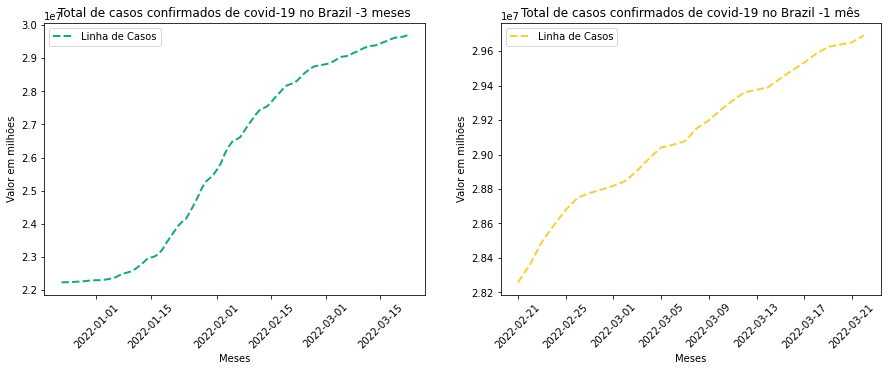

In [12]:
tam = len(dados_Brasil)

plt.figure(figsize=(15, 5), constrained_layout=False)
ax = plt.subplot(1, 2, 1)
plt.plot(pd.to_datetime(etad)[tam-90:tam], sesac[tam-90:tam], color='#17a589', linestyle='--', linewidth=2)
plt.title('Total de casos confirmados de covid-19 no Brazil -3 meses')
plt.legend(['Linha de Casos'])
plt.xlabel('Meses')
plt.xticks(rotation=45)
plt.ylabel('Valor em milhões')

ax = plt.subplot(1, 2, 2)
plt.plot(pd.to_datetime(etad)[tam-30:tam], sesac[tam-30:tam], color='#f4d03f', linestyle='--', linewidth=2 )#, marker='o')
plt.title('Total de casos confirmados de covid-19 no Brazil -1 mês')
plt.legend(['Linha de Casos'])
plt.xlabel('Meses')
plt.xticks(rotation=45)
plt.ylabel('Valor em milhões')
_ = plt.show()

# Nova analise com o métedo ARIMA
tendencia, sazonalidade e aleatoridade

In [13]:
dados_Brasil_dois = pd.DataFrame(dados_Brasil).rename_axis('data')
dados_Brasil_dois.head()

,Brazil
data,
2/26/20,1
2/27/20,1
2/28/20,1
2/29/20,2
3/1/20,2


In [14]:
dados_Brasil_dois.reset_index(level=0, inplace=True)
dados_Brasil_dois.head()

,data,Brazil
0,2/26/20,1
1,2/27/20,1
2,2/28/20,1
3,2/29/20,2
4,3/1/20,2


In [15]:
dados_Brasil_dois.isnull().sum()

data      0
Brazil    0
dtype: int64

In [16]:
print(dados_Brasil_dois.dtypes)

data      object
Brazil     int64
dtype: object


In [17]:
dados_Brasil_dois['data'] = pd.to_datetime(dados_Brasil_dois['data'])
dados_Brasil_dois.head()

,data,Brazil
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2


In [18]:
print(dados_Brasil_dois.dtypes)

data      datetime64[ns]
Brazil             int64
dtype: object


In [19]:
dados = dados_Brasil_dois.set_index('data')
dados.head()

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2


In [20]:
ts = dados_Brasil_dois['Brazil']
ts.head()

0    1
1    1
2    1
3    2
4    2
Name: Brazil, dtype: int64

- Depois de ter feito todos os paços a melhor opção é colocar tudo isso dentro de uma função para otimização de código

In [21]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    dados = dados['Brazil']
    return dados

In [22]:
ts = trans_data(dados_Brasil)
ts.head()

data
2020-02-26    1
2020-02-27    1
2020-02-28    1
2020-02-29    2
2020-03-01    2
Name: Brazil, dtype: int64

In [23]:
decomposicao = seasonal_decompose(ts)

In [24]:
#tendencia
tendencia = decomposicao.trend
tendencia

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29    1.571429e+00
2020-03-01    2.000000e+00
                  ...     
2022-03-18    2.956568e+07
2022-03-19    2.960148e+07
2022-03-20             NaN
2022-03-21             NaN
2022-03-22             NaN
Name: trend, Length: 756, dtype: float64

In [25]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

data
2020-02-26    -3411.300544
2020-02-27     6320.894383
2020-02-28    14696.046586
2020-02-29    15705.457467
2020-03-01    -2335.455417
                  ...     
2022-03-18    14696.046586
2022-03-19    15705.457467
2022-03-20    -2335.455417
2022-03-21   -18519.798541
2022-03-22   -12455.843935
Name: seasonal, Length: 756, dtype: float64

In [26]:
#erro
aleatorio = decomposicao.resid
aleatorio

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29   -15705.028896
2020-03-01     2335.455417
                  ...     
2022-03-18     4424.381986
2022-03-19     7249.685390
2022-03-20             NaN
2022-03-21             NaN
2022-03-22             NaN
Name: resid, Length: 756, dtype: float64

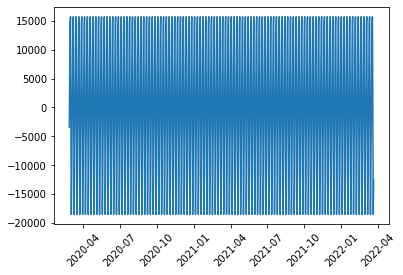

In [27]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)
plt.xticks(rotation=45)
_ = plt.show()

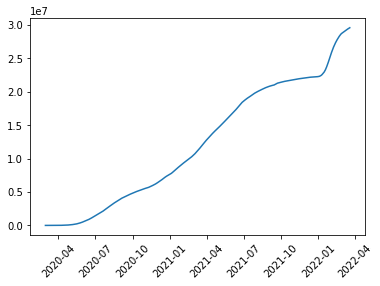

In [28]:
plt.plot(tendencia)
plt.xticks(rotation=45)
_ = plt.show()

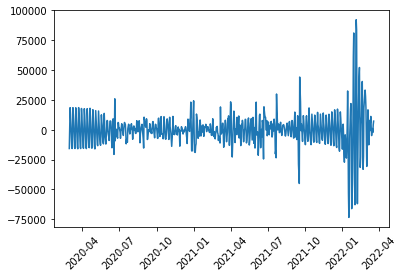

In [29]:
plt.plot(aleatorio)
plt.xticks(rotation=45)
_ = plt.show()

- Ou podemos exibir tudo de uma unica vez

In [30]:
decomp = seasonal_decompose(ts,freq=20)

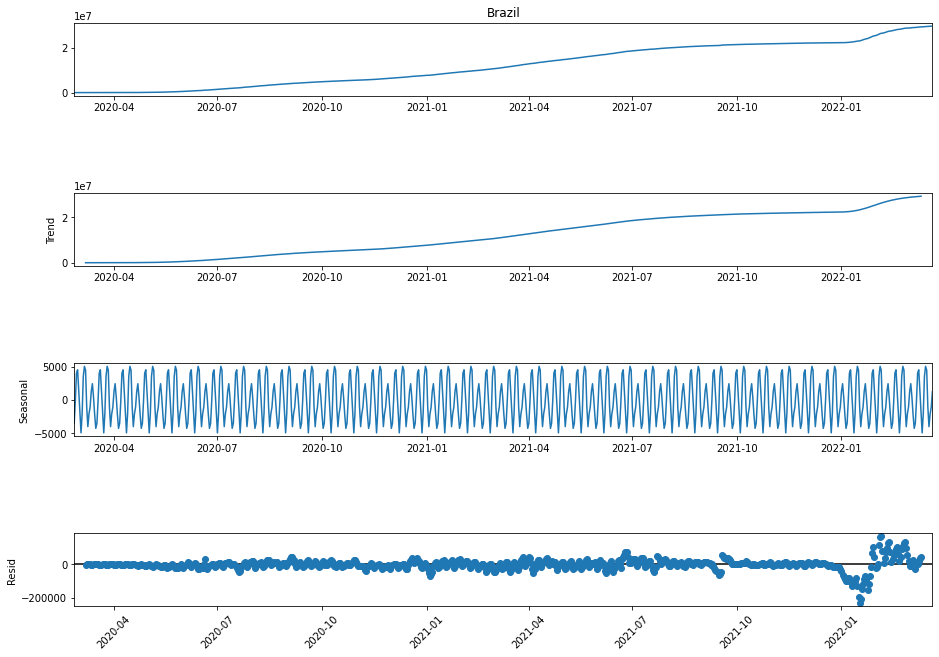

In [31]:
fig = decomp.plot()
fig.set_size_inches(15,10)
plt.xticks(rotation=45)
_ = plt.show()

In [32]:
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Brazil   No. Observations:                  755
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8442.787
Method:                       css-mle   S.D. of innovations          17366.708
Date:                Wed, 23 Mar 2022   AIC                          16897.574
Time:                        21:10:16   BIC                          16925.334
Sample:                    02-27-2020   HQIC                         16908.267
                         - 03-22-2022                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.933e+04   1.21e+04      3.254      0.001    1.56e+04     6.3e+04
ar.L1.D.Brazil     1.1917      0.064     18.758      0.000       1.067       1.316
ar.L2.D.Brazil    -0.2041      0.062     -3.280      0.001      -0.326      -0.082
ma.L1.D.Brazil    -0.3912      0.056     -6.950      0.000      -0.502      -0.281
ma.L2.D.Brazil    -0.3533      0.039     -9.101      0.000      -0.429      -0.277
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0160           +0.0000j            1.0160            0.0000
AR.2            4.8218           +0.0000j            4.8218            0.0000
MA.1            1.2175           +0.0000j            1.2175            0.0000
MA.2           -2.3249           +0.0000j            2.3249            0.5000
-----------------------------------------------------------------------------
"""

In [33]:
# Previsões de 10 datas no futuro
previsoes = modelo_treinado.forecast(steps = 10)[0]
previsoes

array([29735850.58168238, 29774599.69962206, 29812241.39812605,
       29849678.06060493, 29887096.44459816, 29924534.90019839,
       29962001.00530325, 29999495.96187886, 30037019.65540443,
       30074571.70405818])

Text(0, 0.5, 'Valor em milhões')

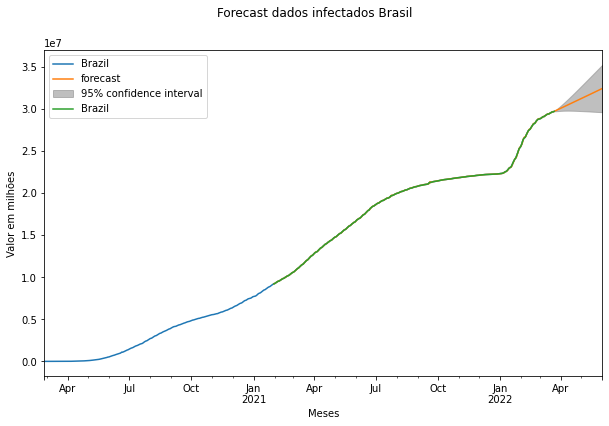

In [34]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot(figsize=(10, 6))
modelo_treinado.plot_predict('2021-01-31', '2022-06-01', ax = eixo, plot_insample = True)
plt.suptitle('Forecast dados infectados Brasil')#, fontweight='bold', fontsize=20)
plt.xlabel('Meses')#, fontweight='bold', fontsize=15)
plt.ylabel('Valor em milhões')#, fontweight='bold', fontsize=15)

- Podemos também incrementar ainda mais nossa função para ficar mais robusta

In [35]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    ts = dados['Brazil']
    adf_test = ADFTest(alpha = 0.05)
    adf_test.should_diff(ts)
    modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
    modelo_treinado = modelo.fit(disp=False)
    eixo = ts.plot(figsize=(10, 6))
    modelo_treinado.plot_predict('2021-01-31', '2022-06-01', ax = eixo, plot_insample = True)
    plt.suptitle('Forecast dados infectados Brasil')
    plt.xlabel('Meses')
    plt.ylabel('Valor em milhões')
    return modelo_treinado

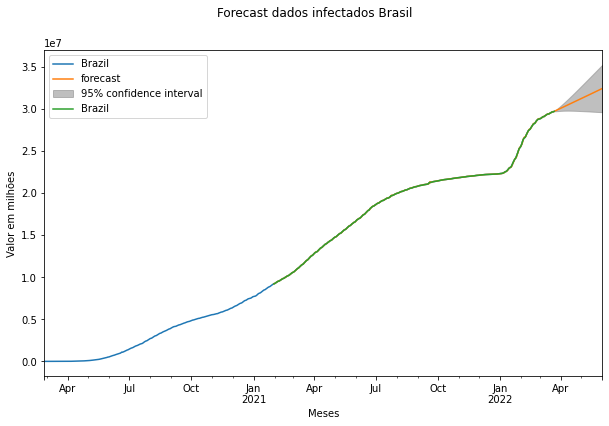

In [36]:
data = trans_data(dados_Brasil)
data

# Reset para exportar dados

In [38]:
df_pais.reset_index()

,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
1,Albania,0,0,0,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
2,Algeria,0,0,0,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
3,Andorra,0,0,0,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
4,Angola,0,0,0,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,653293,653854,654068,654068,654380,654380,654380,654380,654954,654954
194,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
195,Yemen,0,0,0,0,0,0,0,0,0,...,11784,11793,11793,11797,11797,11797,11799,11801,11801,11802
196,Zambia,0,0,0,0,0,0,0,0,0,...,315202,315202,315202,315496,315623,315623,315623,315623,315892,316088


In [39]:
df_pais.to_csv('dadosCovidPaises.csv')